In [74]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [75]:
data = pd.read_csv("fare_prediction_data/train.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'fare_prediction_data/train.csv'

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Discretize fare amounts into 5 categories
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data['fare_category'] = discretizer.fit_transform(data[['fare_amount']])

# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(data[['trip_distance', 'trip_time']], data['fare_category'])

# Predict categories
fare_category_predictions = nb_model.predict(data[['trip_distance', 'trip_time']])
data['nb_fare_prediction'] = discretizer.inverse_transform(fare_category_predictions.reshape(-1, 1))

/Volumes/awaspace/Applications/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [ ]:
data

,Unnamed: 0,trip_distance,trip_time,fare_amount,fare_category,nb_fare_prediction
0,11916225,12.19,34.816667,56.0,1.0,28.9
1,11916626,20.10,33.500000,52.0,1.0,66.7
2,11916363,14.46,27.100000,40.0,0.0,28.9
3,11916491,22.27,52.316667,64.5,1.0,66.7
4,11916565,18.32,47.250000,52.0,1.0,66.7
...,...,...,...,...,...,...
511359,2012131,17.60,47.733333,52.0,1.0,66.7
511360,2004930,19.08,51.616667,52.0,1.0,66.7
511361,2000454,11.69,39.166667,37.0,0.0,28.9
511362,2007423,18.17,40.850000,52.0,1.0,66.7


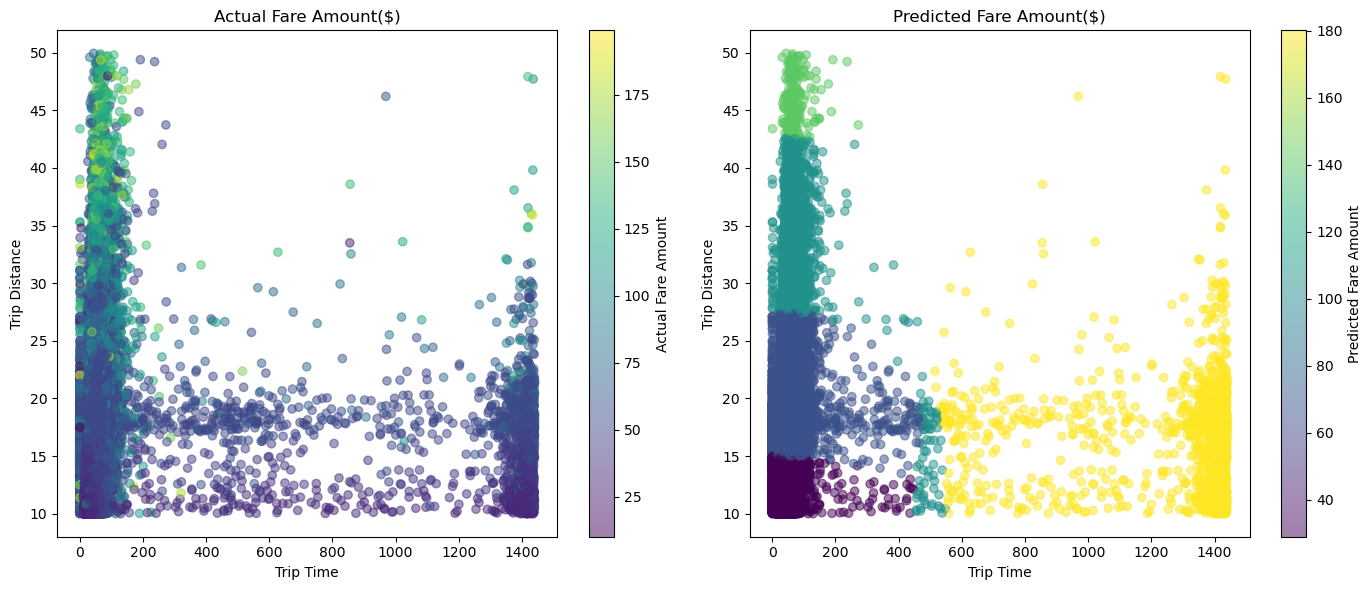

In [ ]:
data = data[data["trip_time"] >= 0]
data = data[data["trip_time"] <= 2000]

plt.figure(figsize=(14, 6))

# Actual fare amounts
plt.subplot(1, 2, 1)
plt.scatter(data['trip_time'], data['trip_distance'], c=data['fare_amount'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Actual Fare Amount')
plt.xlabel('Trip Time')
plt.ylabel('Trip Distance')
plt.title('Actual Fare Amount($)')

# Predicted fare amounts
plt.subplot(1, 2, 2)
plt.scatter(data['trip_time'], data['trip_distance'], c=data['nb_fare_prediction'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Predicted Fare Amount')
plt.xlabel('Trip Time')
plt.ylabel('Trip Distance')
plt.title('Predicted Fare Amount($)')

plt.tight_layout()
plt.show()

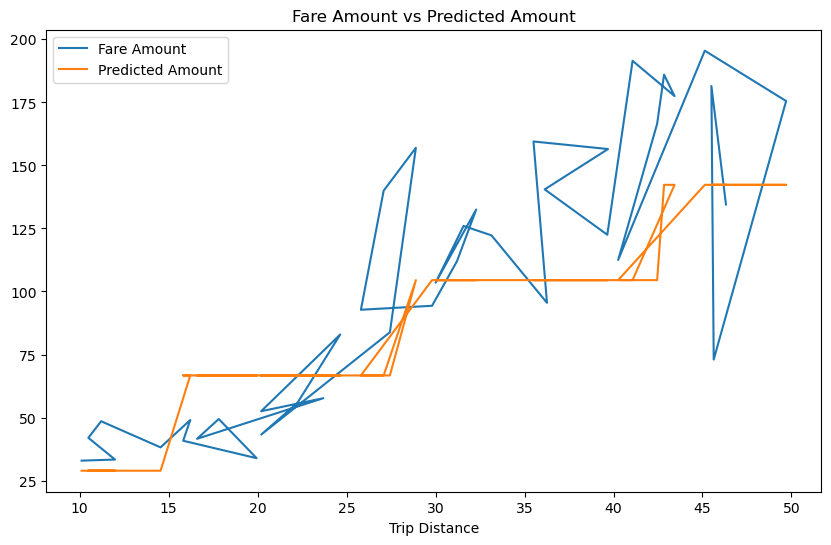

In [ ]:
import numpy as np

def sample_plot(data, column, num=50):
  #  Define number of bins
  num_bins = 10
  bins = np.linspace(0, num, num_bins + 1)
  sampled_data_list = []

  # Sample evenly from each bin
  for i in range(num_bins):
      bin_data = data[(data[column] >= bins[i]) & (data[column] < bins[i+1])]
      if not bin_data.empty:
          sampled_data_list.append(bin_data.sample(min(len(bin_data), 5), random_state=42))

  sampled_data = pd.concat(sampled_data_list)

  return sampled_data

sample = sample_plot(data, 'trip_distance')
plt.figure(figsize=(10, 6))

plt.plot(sample['trip_distance'], sample['fare_amount'], label='Fare Amount')
plt.plot(sample['trip_distance'], sample['nb_fare_prediction'], label='Predicted Amount')
plt.title('Fare Amount vs Predicted Amount')
plt.xlabel('Trip Distance')
plt.legend()

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

# Calculate MSE and MAE
mse = mean_squared_error(data['fare_amount'], data['nb_fare_prediction'])
mae = mean_absolute_error(data['fare_amount'], data['nb_fare_prediction'])
accuracy = accuracy_score(data['fare_category'], data['predicted_fare_category'])


print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Accuracy: {accuracy:.2f}')


Mean Squared Error: 1202.50
Mean Absolute Error: 27.66
